# Project: Investigate a Dataset : The Movie Database 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset contain around 10,000 movies collected from The Movie Database. The dataset has the following columns id
imdb id,popularity,budget,revenue,original title,cast,homepage,director,taglin,keywords,overview,runtime,genres production,companies,release_date,vote_count,vote_average, release_year,budget_adj, revenue_adj. The budget_adj and the revenue_adj columns show the budget and revenue in terms of 2010 dollars which accounts for the inflation.


### Question(s) for Analysis
>1. How Movies released through the years changes.
>2. How does the popularity, revenue and budget vary through out the years. 
>3. Which movies generated more revenue and profit.
>4. Which genres are popular and generate more revenue.

In [3]:
#import pandas, numpy, matplotlib and seaborn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp

<a id='wrangling'></a>
## Data Wrangling


In [4]:
df= pd.read_csv('tmdb-movies.csv')

In [5]:
#View the first 2 rows of the dataset
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [6]:
#Data types for each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
#descriptive statistics for each column of the dataset.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
#the number of columns and rows.
df.shape

(10866, 21)

In [9]:
#check for duplicate entries in the dataset
df.duplicated().sum()

1

In [10]:
#check for the null entries in the dataset

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Action
>There is one duplicate row and the null entries in the dataset are in different columns, therefore  I will drop the irrelevant columns and the duplicate row.

In [11]:
#add a new colum for net profit
df['net_profit'] = df['revenue'] - df['budget']
#Drop columnns : Id,imdb_id,cast,homepage,tagline, director, keywords, overview, production_companies,release_date,vote_count,vote_average
df.drop(['id','imdb_id','cast','homepage','tagline','director','keywords','overview','production_companies','release_date','vote_count','vote_average'],axis=1, inplace= True)
#check the changes after dropping columns and adding the net profit column
df.head(2)

,popularity,budget,revenue,original_title,runtime,genres,release_year,budget_adj,revenue_adj,net_profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08,228436354


In [12]:
#Drop the duplicate entry
df=df.drop_duplicates()
df.duplicated().sum()

0

In [13]:
df.shape

(10865, 10)

In [14]:
df.describe()

,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj,net_profit
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,2001.321859,1.754989e+07,5.136900e+07,2.520261e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,12.813260,3.430753e+07,1.446383e+08,9.659103e+07
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,2011.000000,2.085325e+07,3.370173e+07,9.092453e+06
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


In [15]:
df.release_year.nunique()

56

## Exploratory Data Analysis

### Question 1
>How Movies released through the years changes.

<AxesSubplot:>

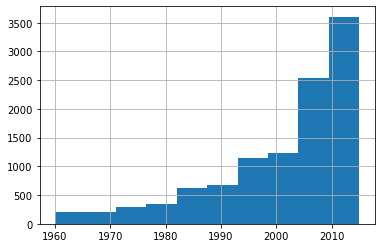

In [16]:
#Movies released through the year using a histogram visualization.
df['release_year'].hist()

In [17]:
#The number of movies released each year.
df['release_year'].value_counts(). head(10)
#The years with the highest number of movies released

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
Name: release_year, dtype: int64

In [18]:
#The number of movies released each year 
df['release_year'].value_counts(). tail(5)
#the years with the lowest number of movies released

1963    34
1960    32
1962    32
1961    31
1969    31
Name: release_year, dtype: int64

### Movie releases have increased over the years, with 2014 having the highest number of movies released ,1969  and 1961 with the least.  There is also a peak in releases between 2000 and 2010 where the number doubled over the years. 

## Question 2
How does popularity, revenue and budget vary through out the years

### Revenue 

<AxesSubplot:xlabel='release_year', ylabel='revenue_adj'>

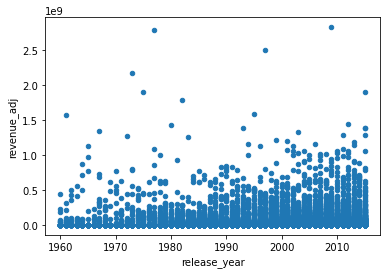

In [19]:
#ploting release_year vs revenue_adj which is adjusted to inflation over the years.
df.plot(x='release_year',y='revenue_adj',kind='scatter')

<AxesSubplot:xlabel='release_year', ylabel='revenue'>

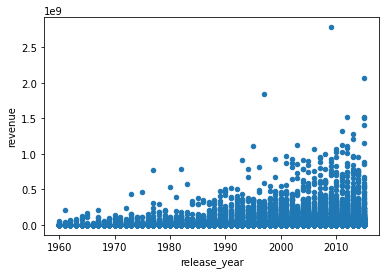

In [20]:
#Ploting release_year vs revenue 
df.plot(x='release_year',y='revenue',kind='scatter')

<AxesSubplot:>

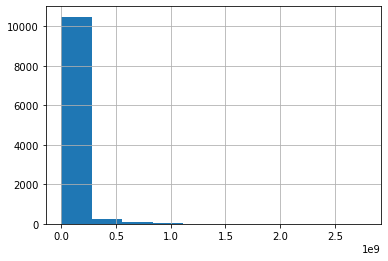

In [21]:
#revenue distribution
df['revenue'].hist()

### budget

<AxesSubplot:xlabel='release_year', ylabel='budget'>

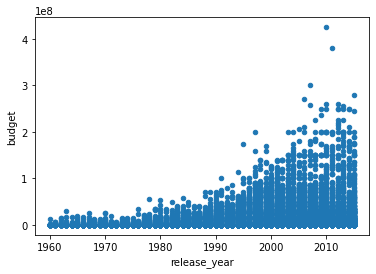

In [22]:
#Budget allocation through the years
df.plot(x='release_year',y='budget',kind='scatter')

<AxesSubplot:>

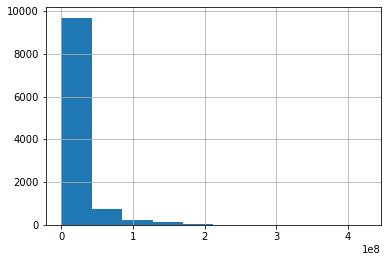

In [23]:
#Budget and Revenue seem to have a positive growth through the years
#buget distribution
df['budget'].hist()

In [24]:
#summary statistics of the budget
df['budget'].describe()

count    1.086500e+04
mean     1.462429e+07
std      3.091428e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [25]:
#revenue summary statistics
df['revenue'].describe()

count    1.086500e+04
mean     3.982690e+07
std      1.170083e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

### Revenue and budget have a positive growth through the years. 
Movies released increased through the years which could explain the increase in revenue and budget.

## Question 3 
>Which movies generated more revenue and profit.

In [42]:
#create a new dataframe with original_title,popularity,bugdet, release_year
new_df = df.filter(['original_title','revenue','popularity','budget','release_year','net_profit'], axis=1)

In [43]:
#view the first rows
new_df.head(5)

,original_title,revenue,popularity,budget,release_year,net_profit
0,Jurassic World,1513528810,32.985763,150000000,2015,1363528810
1,Mad Max: Fury Road,378436354,28.419936,150000000,2015,228436354
2,Insurgent,295238201,13.112507,110000000,2015,185238201
3,Star Wars: The Force Awakens,2068178225,11.173104,200000000,2015,1868178225
4,Furious 7,1506249360,9.335014,190000000,2015,1316249360


In [44]:
#sort the dataframe to reflect movies with high revenue
sort_new= new_df.sort_values(by=['revenue'],ascending=False)
#first 5 
sort_new.head(5)

,original_title,revenue,popularity,budget,release_year,net_profit
1386,Avatar,2781505847,9.432768,237000000,2009,2544505847
3,Star Wars: The Force Awakens,2068178225,11.173104,200000000,2015,1868178225
5231,Titanic,1845034188,4.355219,200000000,1997,1645034188
4361,The Avengers,1519557910,7.637767,220000000,2012,1299557910
0,Jurassic World,1513528810,32.985763,150000000,2015,1363528810


In [45]:
#sort the dataframe ,popularity
sort_new1= new_df.sort_values(by=['popularity'],ascending=False)
#first 5
sort_new1.head()

,original_title,revenue,popularity,budget,release_year,net_profit
0,Jurassic World,1513528810,32.985763,150000000,2015,1363528810
1,Mad Max: Fury Road,378436354,28.419936,150000000,2015,228436354
629,Interstellar,621752480,24.949134,165000000,2014,456752480
630,Guardians of the Galaxy,773312399,14.311205,170000000,2014,603312399
2,Insurgent,295238201,13.112507,110000000,2015,185238201


In [46]:
#sort by revenue and popularity
sort_new2= new_df.sort_values(by=['revenue','popularity'],ascending=False)
#first five 
sort_new2.head()

,original_title,revenue,popularity,budget,release_year,net_profit
1386,Avatar,2781505847,9.432768,237000000,2009,2544505847
3,Star Wars: The Force Awakens,2068178225,11.173104,200000000,2015,1868178225
5231,Titanic,1845034188,4.355219,200000000,1997,1645034188
4361,The Avengers,1519557910,7.637767,220000000,2012,1299557910
0,Jurassic World,1513528810,32.985763,150000000,2015,1363528810


In [48]:
#sort by net profit
sort_new3= new_df.sort_values(by=['net_profit'],ascending=False)
#first five 
sort_new3.head()

,original_title,revenue,popularity,budget,release_year,net_profit
1386,Avatar,2781505847,9.432768,237000000,2009,2544505847
3,Star Wars: The Force Awakens,2068178225,11.173104,200000000,2015,1868178225
5231,Titanic,1845034188,4.355219,200000000,1997,1645034188
0,Jurassic World,1513528810,32.985763,150000000,2015,1363528810
4,Furious 7,1506249360,9.335014,190000000,2015,1316249360


### The most profitable movie is Avatar, which also generated the highest revenue , Jurassic World is the most popular movie , ranked at number 4 in the net profit and 5th in revenue generated.

## Question 4
>Which genres are popular and generate more revenue.

In [49]:
#new dataframe with genres, revenue, popularity , budget and net_profit
genre_df = df.filter(['genres','revenue','popularity','budget','net_profit'], axis=1)
genre_df.head()

,genres,revenue,popularity,budget,net_profit
0,Action|Adventure|Science Fiction|Thriller,1513528810,32.985763,150000000,1363528810
1,Action|Adventure|Science Fiction|Thriller,378436354,28.419936,150000000,228436354
2,Adventure|Science Fiction|Thriller,295238201,13.112507,110000000,185238201
3,Action|Adventure|Science Fiction|Fantasy,2068178225,11.173104,200000000,1868178225
4,Action|Crime|Thriller,1506249360,9.335014,190000000,1316249360


In [50]:
#convert the genres datatype to string
genre_df.genres = genre_df.genres.astype('str')
# split the genres string
genre_df.genres = genre_df.genres.str.split('|')
genre_df.head(5)

,genres,revenue,popularity,budget,net_profit
0,"[Action, Adventure, Science Fiction, Thriller]",1513528810,32.985763,150000000,1363528810
1,"[Action, Adventure, Science Fiction, Thriller]",378436354,28.419936,150000000,228436354
2,"[Adventure, Science Fiction, Thriller]",295238201,13.112507,110000000,185238201
3,"[Action, Adventure, Science Fiction, Fantasy]",2068178225,11.173104,200000000,1868178225
4,"[Action, Crime, Thriller]",1506249360,9.335014,190000000,1316249360


In [51]:
#  use explode to create each row for each genre  
genre_df = genre_df.explode('genres')

In [54]:
#popularity of each genres for each years
print(genre_df['popularity'].describe())
genres_count = genre_df.groupby(['genres'], as_index=False)['popularity'].mean()
genres_count.head()

count    26978.000000
mean         0.705653
std          1.114621
min          0.000065
25%          0.224439
50%          0.410850
75%          0.774231
max         32.985763
Name: popularity, dtype: float64


,genres,popularity
0,Action,0.926274
1,Adventure,1.154259
2,Animation,0.852182
3,Comedy,0.592607
4,Crime,0.744930


In [56]:
#sort according to popularity
genre_p= genres_count.sort_values(by=['popularity'],ascending=False)
genre_p.head(5)

,genres,popularity
1,Adventure,1.154259
15,Science Fiction,1.001548
8,Fantasy,0.992840
0,Action,0.926274
2,Animation,0.852182


The most popular genre is the Adventure.

In [58]:
#group by genres, revenue
genres_revC = genre_df.groupby(['genres'], as_index=False)['revenue'].mean()
genres_revC.head()

,genres,revenue
0,Action,7.279473e+07
1,Adventure,1.131379e+08
2,Animation,7.525606e+07
3,Comedy,3.752624e+07
4,Crime,4.236866e+07


In [59]:
#sort the grouped dataframe to check which genre generated the most revenue
genre_r= genres_revC.sort_values(by=['revenue'],ascending=False)
genre_r.head(5)

,genres,revenue
1,Adventure,1.131379e+08
8,Fantasy,9.631366e+07
2,Animation,7.525606e+07
0,Action,7.279473e+07
7,Family,7.243318e+07


The Adventure genre generated the most revenue.

In [60]:
#group by genres, net profit
genres_profit = genre_df.groupby(['genres'], as_index=False)['net_profit'].mean()
genres_profit.head()

,genres,net_profit
0,Action,4.506691e+07
1,Adventure,7.559417e+07
2,Animation,5.209628e+07
3,Comedy,2.422833e+07
4,Crime,2.470486e+07


In [61]:
#sort the grouped dataframe to check which genre generated the most profit
genre_np= genres_profit.sort_values(by=['net_profit'],ascending=False)
genre_np.head(5)

,genres,net_profit
1,Adventure,7.559417e+07
8,Fantasy,6.370107e+07
2,Animation,5.209628e+07
7,Family,4.907384e+07
15,Science Fiction,4.516788e+07


The most profitable genres are Adventure, Fantasy, Animation, Family and Science Fiction.


# Conclusions
In this analysis I found that over the years more movies have been released which contributed to a positive growth in Revenue, Profits and budgets. 
The most profitable movie in this particular dataset is the Avatar, which has a combination of genres, Action,Adventure, Fantasy, Science Fiction and Mystery. Other profitable movies are Star Wars: The Force Awakens, Titatic, Jurassic World and Furios 7.
However the most popular movies are Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy and Insurgent.
Genres that are associated with high revenue generation are Adventure, Fantasy, Animation, Action and Family. The most popular genres are Adventure , Science Fiction, Fantasy, Action and Animation. Genres that are generating the high revenues are also very popular. 